In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Regressão Linear

Estudo da dependência de uma variável dependente em relaçào a outras variáveis, visando estimar ou prever o valor médio da primeira em termos de valores conhecidos.

Usado em variáveis contínuas.
1. Regressão linear: refere-se quando temos somente uma variavel independente para fazermos a predição.Regressão liner simples é um metodo que nos ajuda a entender a relação entre a variavel independente (preditor) com a dependente(alvo).
2. Regressão linear multipla: refere-se a várias variáveis independentes usadas para fazer a predição.
    

In [2]:
df = pd.read_csv('data/Consumo_cerveja.csv',sep=';')

In [3]:
df.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
df.shape

(365, 7)

## Estatística descritiva

In [5]:
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data          365 non-null object
temp_media    365 non-null float64
temp_min      365 non-null float64
temp_max      365 non-null float64
chuva         365 non-null float64
fds           365 non-null int64
consumo       365 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.0+ KB


## Matriz de correlação

O coeficiente de correlação é uma medida de correlação linear entre 2 variáveis e situa-se entre -1 e 1. 

-1 (associação negativa perfeita, enquanto um cresce outro diminui)

1 (associação positiva perfeita)

0: Nenhum relacionamento


Correlação é uma metrica estatistica para mensurar o quanto que as varáveis são interdependentes.


Se uma variável alterar o quanto que isso vai afetar a outa?


In [7]:
df.corr()

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
chuva,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fds,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


Quando eu tenho uma correlação altissima entre 2 varaveis independentes não é bom para o modelo, podendo gerar problema. Evite de colocar as duas juntas.quando eu tenho uma correlação altissima entre 2 varaveis independentes não é bom para o modelo, podendo gerar problema.


Podemos dizer que há uma relação forte quando:
Coeficiente de correlação for proximo de 1 ou -1


## Plotar a variavel Y(consumo)

Para ver se não há quebra na estrutura, e observar ela e tomar uma decisão com base

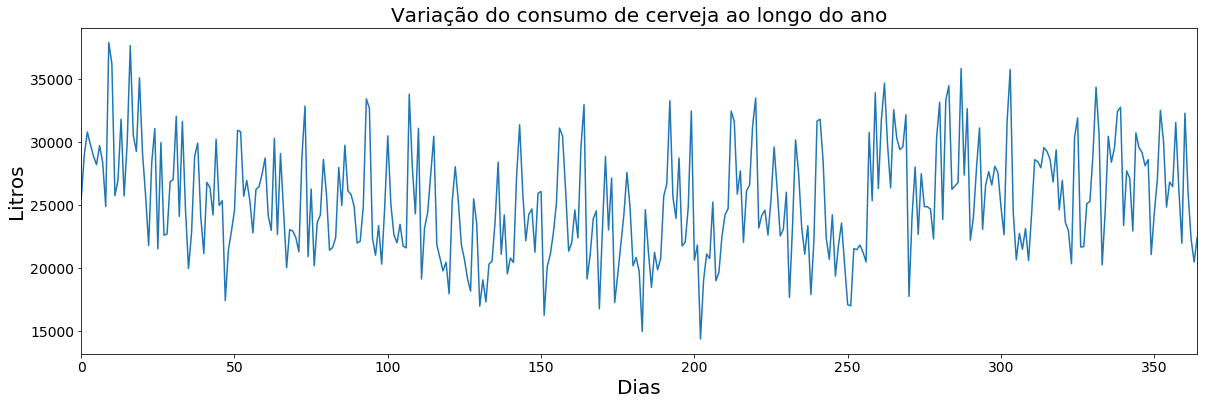

In [8]:
fig,ax = plt.subplots(figsize=(20,6))
ax.set_title('Variação do consumo de cerveja ao longo do ano',fontsize=20)
ax.set_ylabel('Litros',fontsize=20)
ax.set_xlabel('Dias',fontsize=20)
ax = df['consumo'].plot(fontsize=14)
#mostrar as variações do consumo, como ele se comportou ao longo do tempo.
#queda de estruturas são dificeis de modelar

## Boxplot

In [9]:
import seaborn as sns

Text(0, 0.5, 'Litros')

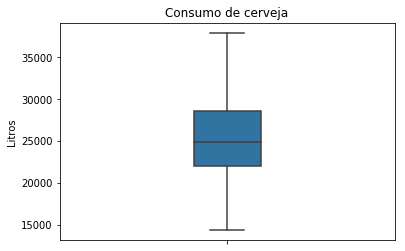

In [10]:
ax = sns.boxplot(df['consumo'],orient='v',width=0.2)
ax.set_title('Consumo de cerveja')
ax.set_ylabel('Litros')

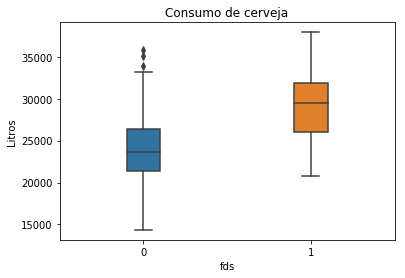

In [11]:
ax = sns.boxplot(x=df.fds, y=df.consumo,orient='v',width=0.2)
ax.set_title('Consumo de cerveja')
ax.set_ylabel('Litros')
ax.set_label('Final de semana')

## Distribuição de frequencias

Modelos de regressão linear assumem, inicialmente, que a variável dependente segue uma distribuição normal.

Quando fazemos uma pesquisa rápida no Google imagens de "curva normal", vemos mais ou menos como essa distribuição deve se comportar. Nem sempre esse é o comportamento obtido quando trabalhamos com dados reais.

Os métodos estatísticos mais conhecidos supõem que a variável dependente segue a distribuição normal.

Uma forma preliminar de se averiguar a hipótese de normalidade da variável dependente é através do histograma

Uma das funções da biblioteca seaborn para plotar o histograma de uma variável é a distplot() 

Text(0.5, 1.0, 'Consumo')

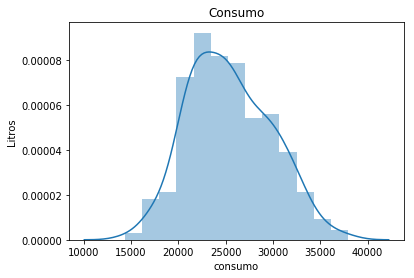

In [12]:
ax = sns.distplot(df['consumo'])
ax.set_ylabel('Litros')
ax.set_title('Consumo')

## Variavel dependente X Variavel Explicativa (pairplot)

Plotar o relacionamento entre pares de variaveis em um dataset

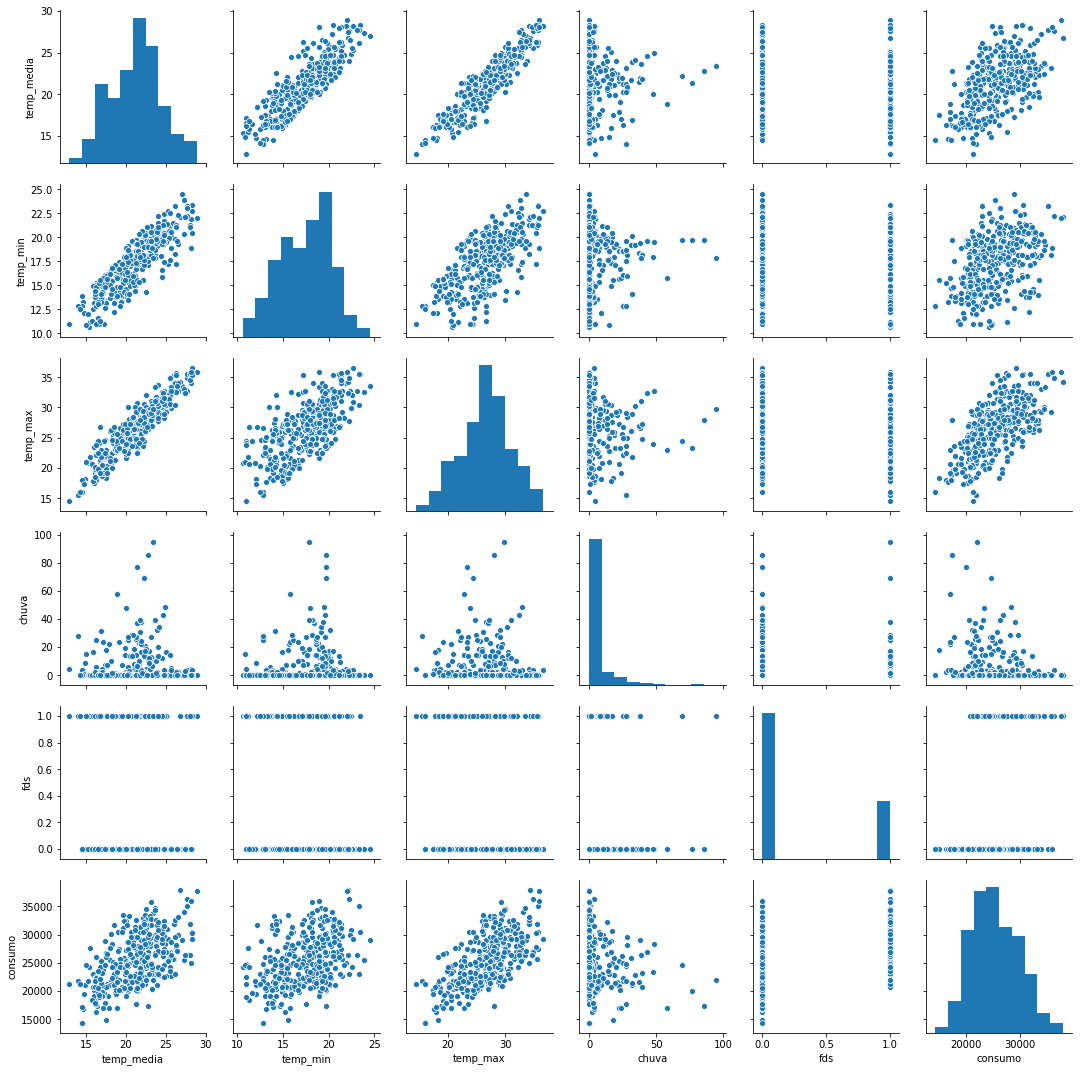

In [13]:
ax = sns.pairplot(df)

## Plotar pairplot usando somente uma variavel no eixo Y

Text(0.5, 1.05, 'Disperção entre as variaveis')

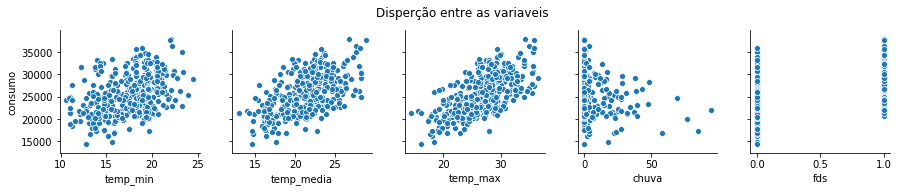

In [14]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'])
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Esse método faz mais de um tipo de dados, o 'scatter' apresentado acima e o 'reg'

Text(0.5, 1.05, 'Disperção entre as variaveis')

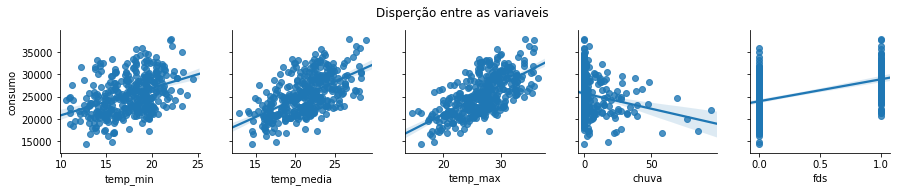

In [15]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'],kind='reg')
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

### Variavel dependente X Variavel Explicativa (jointplot)

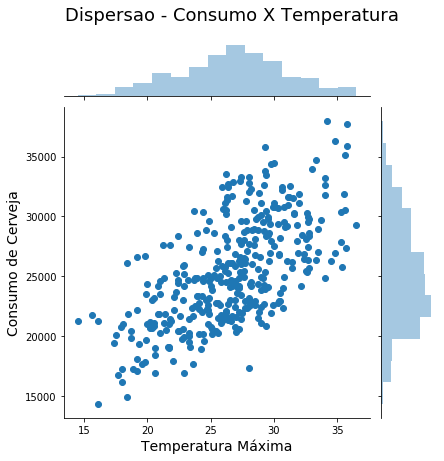

In [16]:
ax = sns.jointplot(x="temp_max", y="consumo", data=df)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

Acima vemos a distribuiçào de frequancia da temperatuda máxima e ao lado vemos a distribuição de frequencia do consumo de cerveja.

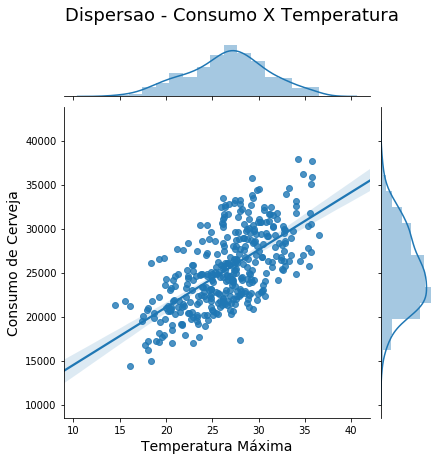

In [17]:
ax = sns.jointplot(x="temp_max", y="consumo", data=df, kind='reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

## Variavel dependente X Variavel Explicativa (Lmplot)

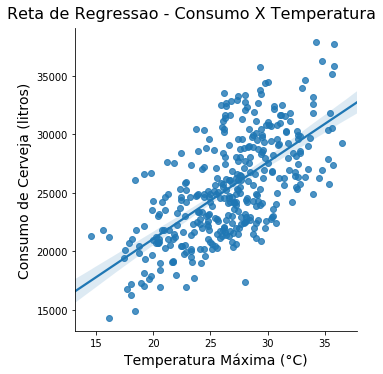

In [18]:
ax= sns.lmplot(x="temp_max", y="consumo", data=df)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

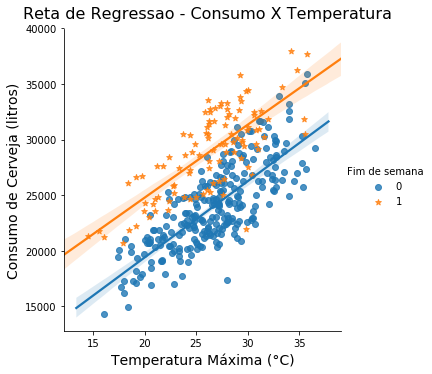

In [19]:
ax= sns.lmplot(x="temp_max", y="consumo", data=df, hue='fds', markers=['o','*'],legend=False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de semana")
ax

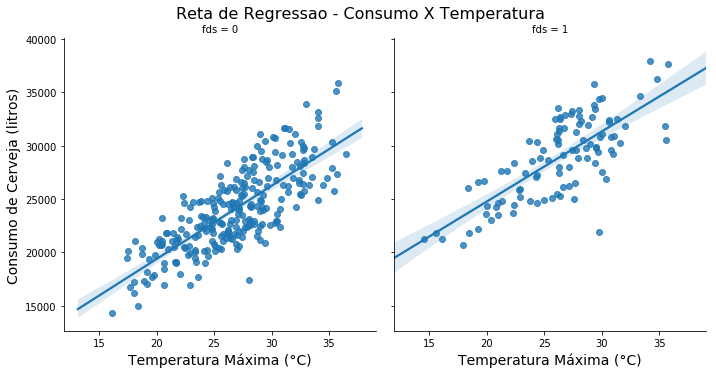

In [20]:
ax= sns.lmplot(x="temp_max", y="consumo", data=df, col='fds')
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
y = df['consumo']

In [23]:
X = df[['temp_max','fds','chuva']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [25]:
X_train.shape

(255, 3)

In [26]:
 X_test.shape

(110, 3)

In [27]:
y_train.shape

(255,)

In [28]:
 y_test.shape

(110,)

# Estimando o modelo de Regressão

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
modelo = LinearRegression()

In [31]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Calcular o coeficiante de determinação

Medida resumida do grau de ajuste da nossa reta de regressão. 

Ou seja, o quanto nossa reta de regressão consegue explicar as variações da nossa variavel dependente Y

#### R quadrado

In [32]:
print("R quadrado = {}".format(modelo.score(X_train,y_train).round(2)))

R quadrado = 0.73


## Previsão do modelo

In [33]:
lm = modelo.predict(X_test)

In [34]:
print("R quadrado de teste = {}".format(metrics.r2_score(y_test,lm).round(2)))

R quadrado de teste = 0.69


Ao aumentarmos o número de variáveis as estatísticas poderão ser melhoradas e assim teremos um modelo mais eficiente.

## Interpretação dos coeficientes estimados

O Intercepto representa o efeito em Y quando Xs são iguais a zero.

In [35]:
modelo.intercept_

5951.976339312456

In [36]:
type(modelo.intercept_)

numpy.float64

Coeficientes de regressão:
    
É o efeito do valor médio de Y dado a variação de X.
Em outras palavras, ele nos dá o valor direto ou "liquido" de uma unidade de variação X2 sobre o valor médio de Y, excluindo os efeitos dos outros X

In [37]:
modelo.coef_

array([ 684.73675898, 5401.08333866,  -60.7824355 ])

1.O intercepto representa o efeito médio em Y (variável dependente), tendo todas as variáveis explicativas excluídas do modelo

2.Os coeficientes de regressão (β’s) são conhecidos como coeficientes parciais de regressão, ou coeficientes parciais angulares

In [38]:
type(modelo.coef_)

numpy.ndarray

In [39]:
X.columns

Index(['temp_max', 'fds', 'chuva'], dtype='object')

In [40]:
index = ['Intercept','Temp Max','Chuva','fds']

In [41]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index,columns=['Parametros'])

,Parametros
Intercept,5951.976339
Temp Max,684.736759
Chuva,5401.083339
fds,-60.782435


### Interpretação

1.Intercept ==> Excluindo os efeitos de X(temp max, chuve e fds), o efeito médio de consumo é de 5951.976339

2.Temp max ==> Mantendo os valores constantes de X3 (temp max) e X4 (chuva), com aumento de 1 grau Celsius, gera uma variação de 684.736759

3.Chuva ==> Mantendo os valores de X2 (Temp max) e X4(Final de semana) contantes, com o aumento de 1mm de Chuva a variação média de consumo é de 5401.083339.

4.Final de semana ==> Mantendo os valores de X2 e X3 constantes, o fato do dia ser classificado como final de semana gera uma variação de -60.782435 no consumo.

### Gerando previsões

In [42]:
y_predict_train = modelo.predict(X_train)

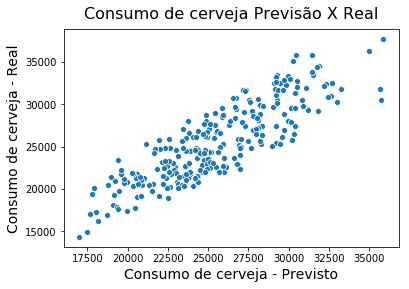

In [43]:
ax = sns.scatterplot(x = y_predict_train,y=y_train)
ax.set_title('Consumo de cerveja Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Consumo de cerveja - Previsto", fontsize=14)
ax.set_ylabel("Consumo de cerveja - Real", fontsize=14)
ax

Podemos notar que chegando no final do grafico, os resultados estão bem maiores que o previsto

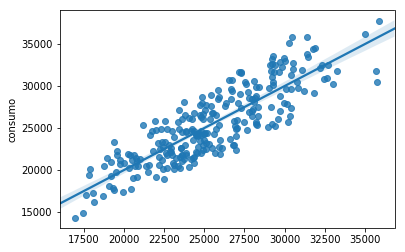

In [44]:
ax = sns.regplot(x = y_predict_train,y=y_train)

### Obter resíduos ou Taxa de Erro

Metodo informal de verificação da hipotese de variância constante dos residuos(homocedasticidade)

residuo = y_Real – y_Previsto

In [45]:
residuo = y_train - y_predict_train


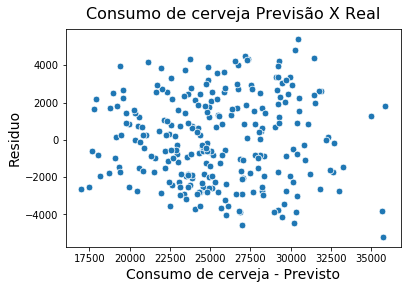

In [46]:
ax = sns.scatterplot(y_predict_train, residuo,s=45)
ax.set_title('Consumo de cerveja Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Consumo de cerveja - Previsto", fontsize=14)
ax.set_ylabel("Residuo", fontsize=14)
ax

Podemos validar se a variância dos dados é constante, oque claramente não é nosso caso

Elevando o residuo ao quadrado, podemos comparar para ver se há presença de Heterocedasticidade, oque não é bom.

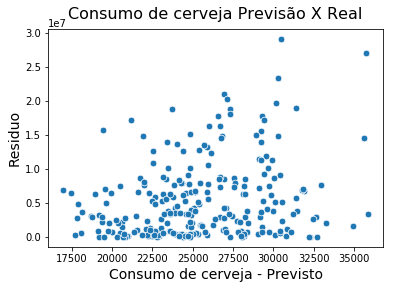

In [47]:
ax = sns.scatterplot(y_predict_train, residuo**2,s=45)
ax.set_title('Consumo de cerveja Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Consumo de cerveja - Previsto", fontsize=14)
ax.set_ylabel("Residuo", fontsize=14)
ax

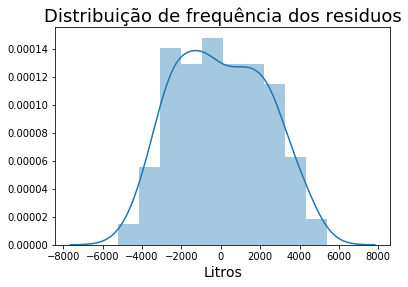

In [48]:
ax = sns.distplot(residuo)
ax.set_title("Distribuição de frequência dos residuos",fontsize=18)
ax.set_xlabel("Litros",fontsize=14)
ax

## Comparando modelos

Estimando um novo modelo com a substituição da variavel explicativa Temp Max pela Temp Media

In [49]:
X2 = df[['temp_media','chuva','fds']]

In [50]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y,test_size=0.3, random_state=2811)

In [51]:
modelo2 = LinearRegression()

In [52]:
modelo2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
print('Modelo com temp Media')
print("R quadrado = {}".format(modelo2.score(X2_train,y2_train).round(2)))

Modelo com temp Media
R quadrado = 0.66


In [54]:
print('Modelo com temp Max')
print("R quadrado = {}".format(modelo.score(X_train,y_train).round(2)))

Modelo com temp Max
R quadrado = 0.73


## Teste - Métricas

In [55]:
y_predict = modelo2.predict(X2_test)

In [56]:
print("Modelo de teste com temp Media")
print("R quadrado = {}".format(metrics.r2_score(y2_test,y_predict).round(2)))

Modelo de teste com temp Media
R quadrado = 0.66


In [57]:
print("Modelo de teste com temp Max")
print("R quadrado = {}".format(metrics.r2_score(y_test,lm).round(2)))

Modelo de teste com temp Max
R quadrado = 0.69


#### Erro Quadrático Médio

É o resíduo ao quadrado e faz a média de todos os pontos.
Lembre-se que o EQM deve ser minimizado e o R² deve ser maximizado.

##### SQM - Raiz de erros quadráticos médios

É a raiz quadrada do erro quadrático. Precisamos minimizar essas taxas de erros

In [58]:
EQM = metrics.mean_squared_error(y2_test,y_predict).round(2)
REQM = np.sqrt(EQM).round(2)
R2 = metrics.r2_score(y2_test,y_predict).round(2)

pd.DataFrame([EQM, REQM,R2], index=['EQM','REQM','R2'],columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R2,0.66


In [59]:
EQM2 = metrics.mean_squared_error(y_test,lm).round(2)
REQM2 = np.sqrt(EQM2).round(2)
R2_2 = metrics.r2_score(y_test,lm).round(2)

pd.DataFrame([EQM2, REQM2,R2_2], index=['EQM','REQM','R2'],columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R2,0.69


Como eu leio?
REQM = Eu tenho 2339.23 Litros de erro


## Salvando e carregando o modelo

É uma biblioteca do Python que implementa protocolos binários para serializar e deserializar a estrutura de um objeto Python

In [61]:
import pickle

In [62]:
output = open('modelo_consumo_cerveja','wb')
#para armazenar/serializar nosso modelo
pickle.dump(modelo,output)
output.close()

## Para abrir em um novo notebook

In [ ]:
import pickle

modelo = open('modelo_consumo_cerveja','rb')
#carregar/desserializar o modelo
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuve = 12.2
fds = 0
entrada = [[temp_max,chuva,fds]]
print('{} litros'.format(lm_new.predict(entrada)[0]))